# Variational Autoencoder on Fashion-MNIST.

Trains a VAE on Fashion-MNIST.

In [1]:
from keras import models, layers
from ngdlm import models as ngdlmodels
from ngdlm import utils as ngdlutils
from keras.datasets import fashion_mnist
import numpy as np

Using TensorFlow backend.


# Train- and test-data.

In [2]:
(x_input_train, _), (x_input_test, y_output_test) = fashion_mnist.load_data()
x_input_train = x_input_train.astype("float32") / 255.0
x_input_test = x_input_test.astype("float32") / 255.0
print(x_input_train.shape)
print(x_input_test.shape)

(60000, 28, 28)
(10000, 28, 28)


# Variational autoencoder.

In [3]:
latent_dim = 2

# Create the encoder.
encoder_input = layers.Input(shape=(28, 28))
encoder_output = layers.Reshape((28 * 28,))(encoder_input)
encoder_output = layers.Dense(512, activation="relu")(encoder_output)

# Create the decoder.
decoder_input = layers.Input(shape=(latent_dim,))
decoder_output = layers.Dense(512, activation="relu")(decoder_input)
decoder_output = layers.Dense(28 * 28, activation="sigmoid")(decoder_output)
decoder_output = layers.Reshape((28, 28))(decoder_output)

# Create the autoencoder.
vae = ngdlmodels.VAE(encoder_input, encoder_output, decoder_input, decoder_output, latent_dim=latent_dim)
vae.compile(optimizer='adadelta', reconstruction_loss="binary_crossentropy")
vae.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 28, 28)       0                                            
__________________________________________________________________________________________________
reshape_1 (Reshape)             (None, 784)          0           input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 512)          401920      reshape_1[0][0]                  
__________________________________________________________________________________________________
z_mean (Dense)                  (None, 2)            1026        dense_1[0][0]                    
__________________________________________________________________________________________________
z_log_var 

# Visualizing variational autoencoder.

Rendering reconstructions...


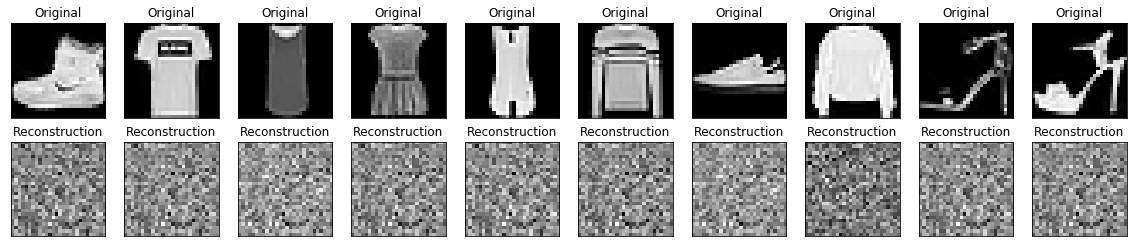

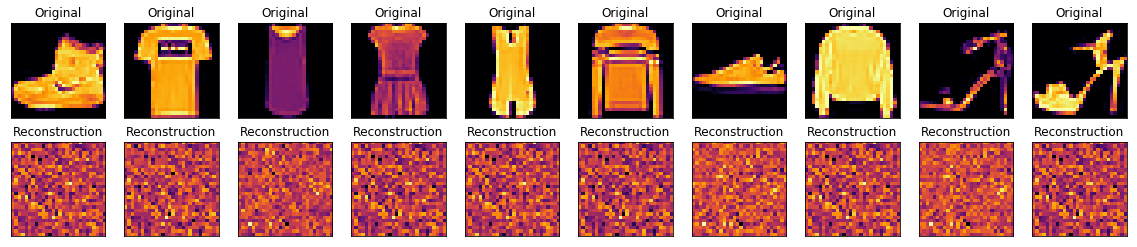

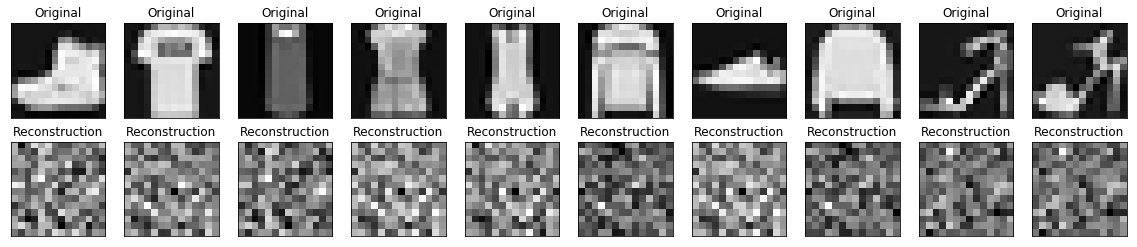

Rendering latent-space...


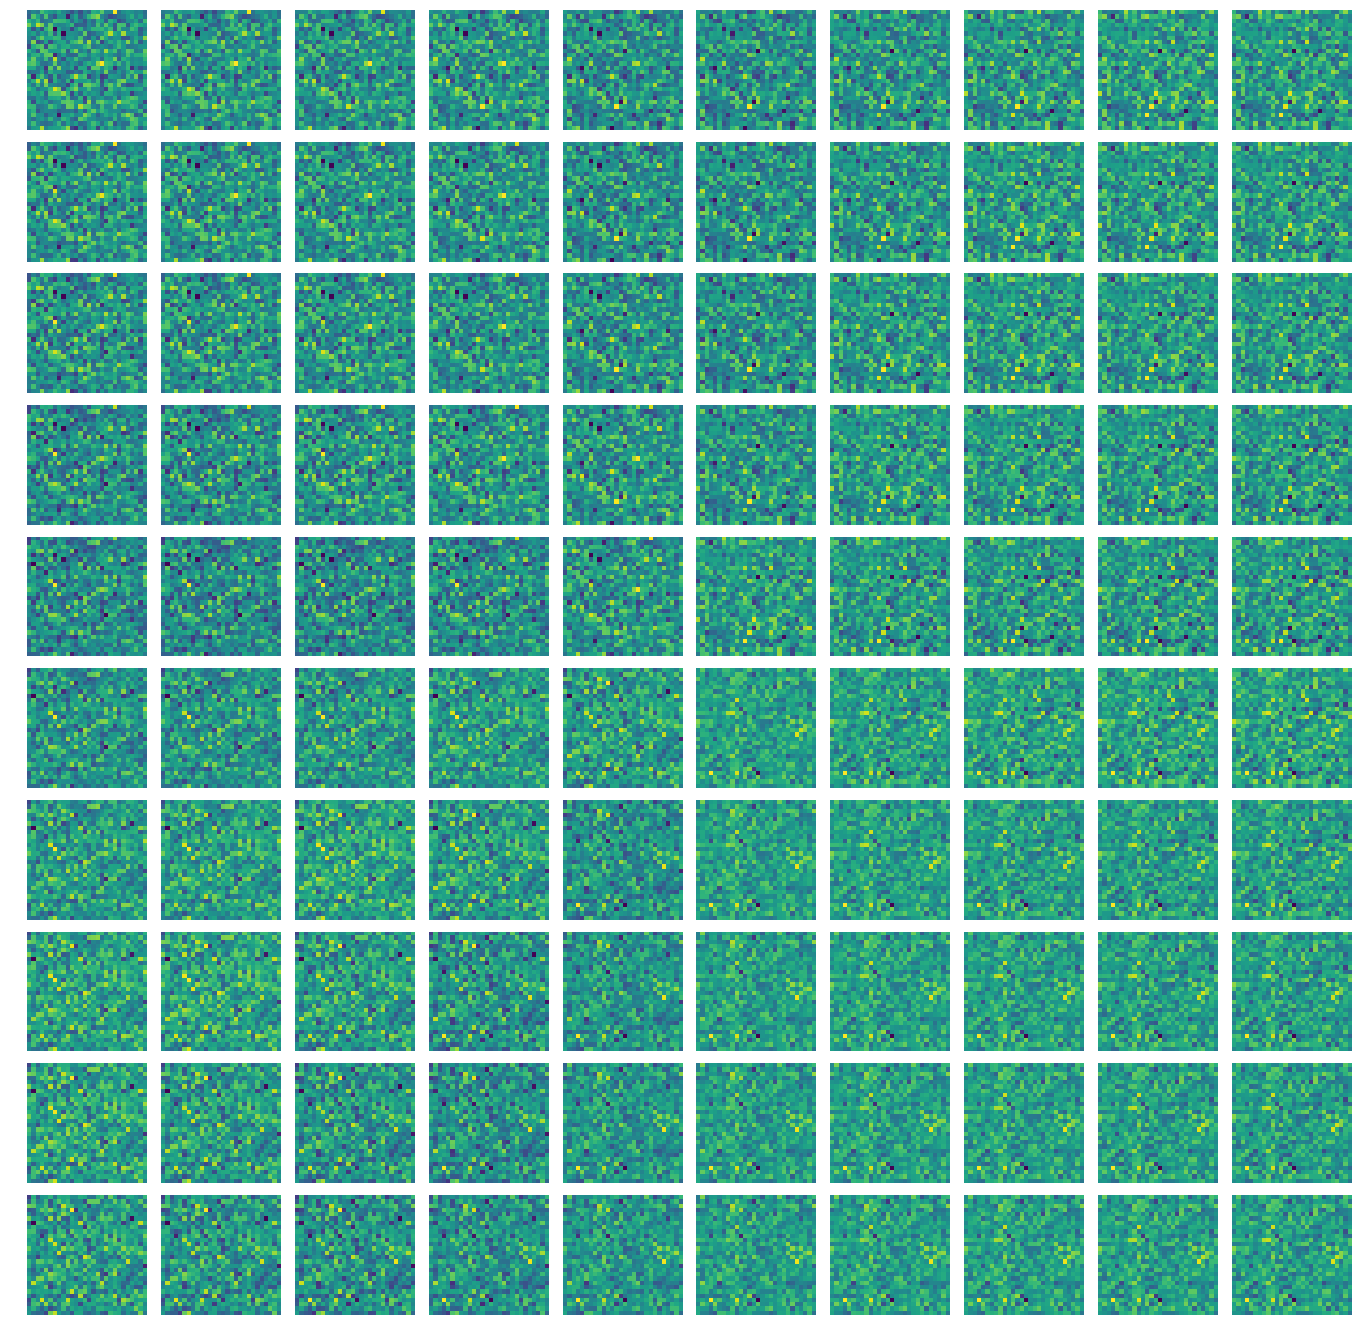

Rendering encodings...


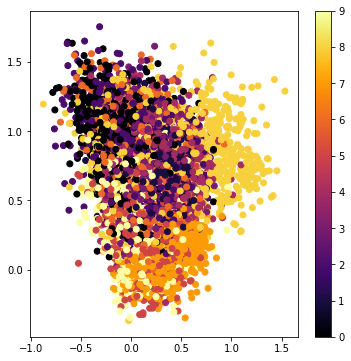

In [6]:
print("Rendering reconstructions...")
ngdlutils.render_image_reconstructions(vae, x_input_train[0:10])
ngdlutils.render_image_reconstructions(vae, x_input_train[0:10], cmap="inferno")
ngdlutils.render_image_reconstructions(vae, x_input_train[0:10], image_size=(14, 14))

print("Rendering latent-space...")
ngdlutils.render_image_latent_space(vae.decoder, 10)

print("Rendering encodings...")
ngdlutils.render_encodings(vae.encoder, x_input_test, y_output_test)